# データの読み取り

In [14]:
import pandas as pd

df = pd.read_csv("jitensha.csv")
df.head()

,罪名,手口,管轄警察署（発生地）,管轄交番・駐在所（発生地）,市区町村コード（発生地）,都道府県（発生地）,市区町村（発生地）,町丁目（発生地）,発生年月日（始期）,発生時（始期）,発生場所,発生場所の詳細,被害者の年齢,被害者の職業,施錠関係
0,窃盗,自転車盗,千葉中央,千葉寺駅前,121011.0,千葉県,千葉市中央区,青葉町,20240117,23,その他の住宅（３階建て以下共同住宅等）,駐車（輪）場,20歳代,大学生,施錠した
1,窃盗,自転車盗,千葉中央,千葉寺駅前,121011.0,千葉県,千葉市中央区,青葉町,20240227,18,駐車（輪）場,駐車（輪）場,10歳代,中学生,施錠せず
2,窃盗,自転車盗,千葉中央,千葉寺駅前,121011.0,千葉県,千葉市中央区,青葉町,20240528,20,駐車（輪）場,駐車（輪）場,40歳代,その他,施錠した
3,窃盗,自転車盗,千葉中央,千葉寺駅前,121011.0,千葉県,千葉市中央区,青葉町,20240627,21,駐車（輪）場,駐車（輪）場,10歳代,中学生,施錠せず
4,窃盗,自転車盗,千葉中央,千葉寺駅前,121011.0,千葉県,千葉市中央区,青葉町,20240917,14,その他,その他,20歳代,その他,施錠せず


# 市区町村ごとの件数

In [7]:
df.groupby('市区町村（発生地）').size().sort_values(ascending=False)

市区町村（発生地）
船橋市        1263
市川市         872
柏市          691
松戸市         678
千葉市中央区      656
八千代市        458
習志野市        450
浦安市         435
野田市         367
千葉市稲毛区      334
千葉市美浜区      328
千葉市若葉区      313
流山市         302
千葉市花見川区     290
市原市         285
千葉市緑区       213
成田市         211
四街道市        165
木更津市        157
佐倉市         146
鎌ケ谷市        140
印西市         125
八街市         115
我孫子市        114
東金市         103
茂原市          94
君津市          84
旭市           64
白井市          63
館山市          52
富津市          45
袖ケ浦市         42
富里市          31
酒々井町         30
銚子市          30
大網白里市        26
山武市          24
香取市          22
一宮町          21
鴨川市          16
いすみ市         15
栄町           14
横芝光町         11
匝瑳市           9
長生村           9
南房総市          8
鋸南町           5
多古町           4
東庄町           3
九十九里町         3
神崎町           2
睦沢町           1
白子町           1
御宿町           1
勝浦市           1
dtype: int64

# 時間帯　（例：深夜・朝・昼・夕方）

In [3]:
df.groupby('発生時（始期）').size().sort_values(ascending=False)

発生時（始期）
7     919
18    875
17    859
16    695
8     675
19    606
12    508
20    500
15    473
10    433
21    413
9     411
13    390
14    388
11    371
6     333
22    311
23    229
0     167
不明    115
5     113
1      74
2      32
4      30
3      23
dtype: int64

# 鍵の有無

In [4]:
df.groupby('施錠関係').size()

施錠関係
施錠した    3162
施錠せず    6781
dtype: int64

# 月ごとの件数

In [5]:
df['発生日'] = pd.to_datetime(df['発生年月日（始期）'], format="%Y%m%d", errors='coerce')
df['月'] = df['発生日'].dt.month
df.groupby('月').size()

月
1.0      620
2.0      569
3.0      681
4.0      761
5.0      813
6.0      826
7.0     1027
8.0      943
9.0      984
10.0     956
11.0     888
12.0     782
dtype: int64

# 被害者の職業

In [15]:
df.groupby('被害者の職業').size().sort_values(ascending=False)

被害者の職業
その他            4968
高校生            2208
大学生            1612
中学生             886
小学生             239
法人・団体、被害者なし      30
dtype: int64

In [17]:
pip install matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 12.9 MB/s  0:00:00m0:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 13.4 MB/s  0:00:00 eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 15.5 MB/s  0:00:00 eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7/7 [matplotlib]7 [matplotlib]

[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


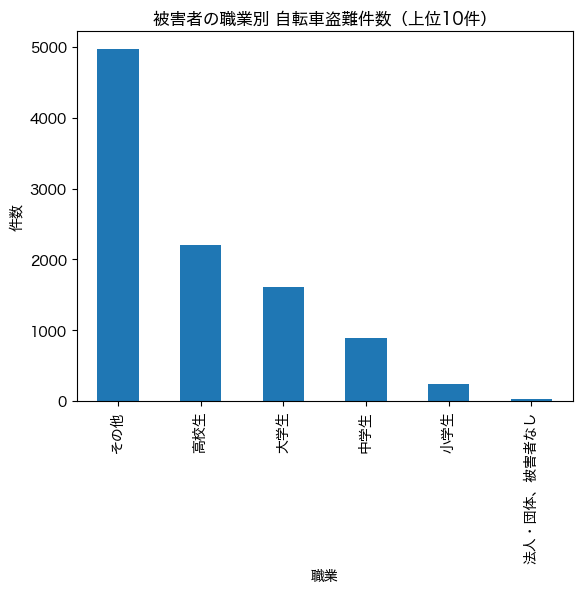

In [41]:
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'Hiragino Sans'   # Mac
# plt.rcParams['font.family'] = 'MS Gothic'     # Windows

df = pd.read_csv('jitensha.csv', engine='python')


occupation_counts = df['被害者の職業'].value_counts().head(10)
occupation_counts.plot(kind='bar')
plt.xlabel('職業')
plt.ylabel('件数')
plt.title('被害者の職業別 自転車盗難件数（上位10件）')
plt.show()


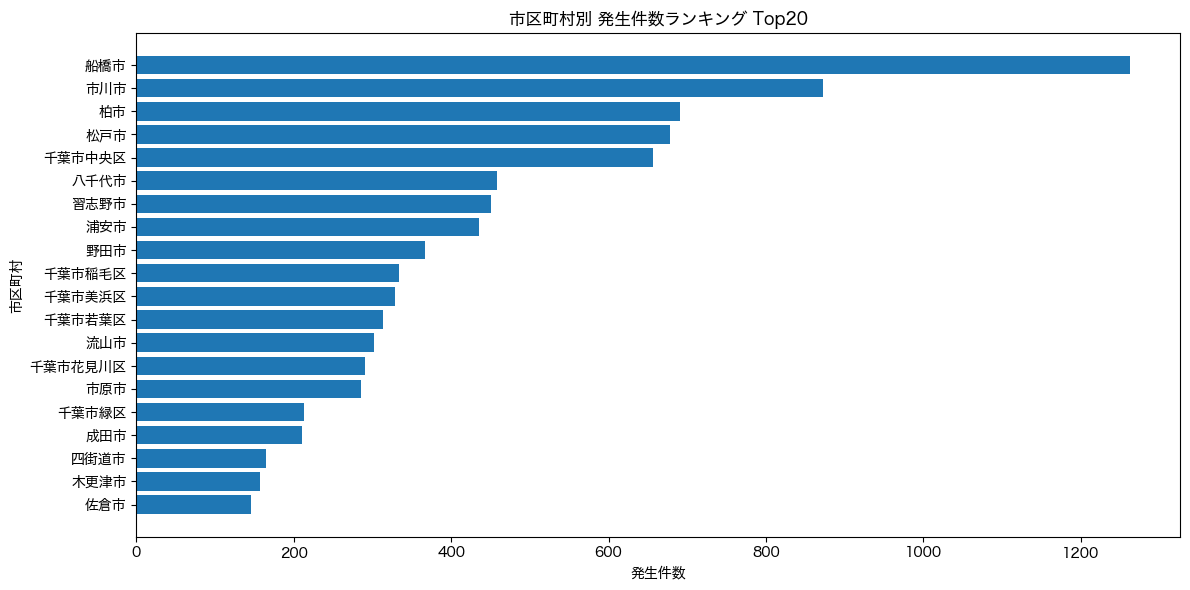

In [46]:
import matplotlib.pyplot as plt

# 市区町村ごとに件数を数える
city_counts = df.groupby('市区町村（発生地）').size().sort_values(ascending=False).head(20)

plt.figure(figsize=(12, 6))
plt.barh(city_counts.index, city_counts.values)
plt.xlabel('発生件数')
plt.ylabel('市区町村')
plt.title('市区町村別 発生件数ランキング Top20')
plt.gca().invert_yaxis()  # 上位が上に来るように
plt.tight_layout()
plt.show()


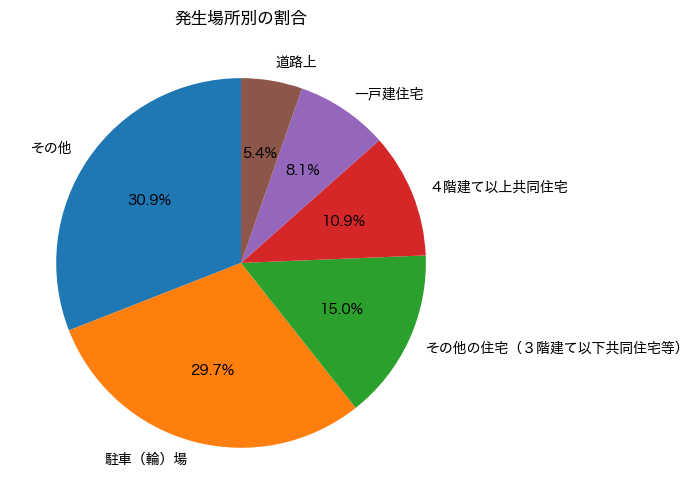

In [47]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Hiragino Sans'  # Mac
# Windows の場合 → plt.rcParams['font.family'] = 'MS Gothic'

place_counts = df['発生場所'].value_counts()

plt.figure(figsize=(7, 7))
plt.pie(place_counts.values,
        labels=place_counts.index,
        autopct='%1.1f%%',
        startangle=90)
plt.title('発生場所別の割合')
plt.tight_layout()
plt.show()


/var/folders/kb/w54b0xy16hdfhd_gq4mpwf_00000gn/T/ipykernel_35278/1676633978.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top3['発生時（始期）'] = df_top3['発生時（始期）'].astype(str)
/var/folders/kb/w54b0xy16hdfhd_gq4mpwf_00000gn/T/ipykernel_35278/1676633978.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top3['count'] = 1    # ここが重要


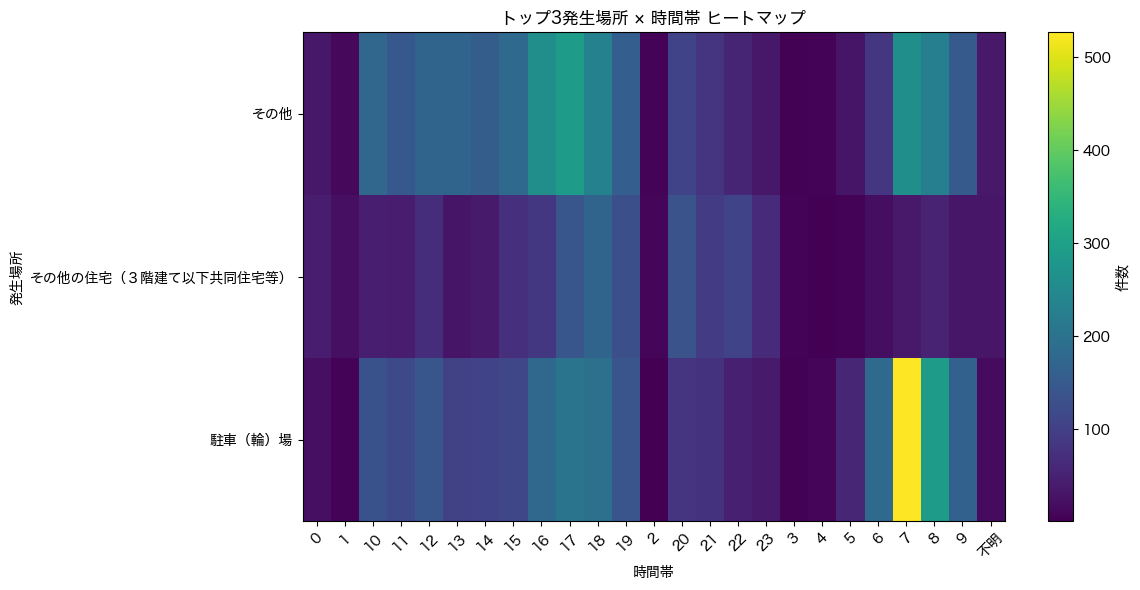

In [58]:
import matplotlib.pyplot as plt

top3 = df['発生場所'].value_counts().head(3).index
df_top3 = df[df['発生場所'].isin(top3)]

df_top3['発生時（始期）'] = df_top3['発生時（始期）'].astype(str)
df_top3['count'] = 1    # ここが重要

pivot = df_top3.pivot_table(
    index='発生場所',
    columns='発生時（始期）',
    values='count',
    aggfunc='sum',
    fill_value=0
)

plt.figure(figsize=(12, 6))
plt.imshow(pivot, aspect='auto')
plt.colorbar(label='件数')
plt.xticks(range(len(pivot.columns)), pivot.columns, rotation=45)
plt.yticks(range(len(pivot.index)), pivot.index)
plt.title('トップ3発生場所 × 時間帯 ヒートマップ')
plt.xlabel('時間帯')
plt.ylabel('発生場所')
plt.tight_layout()
plt.show()
